# Speech Emotion Recognition on TESS Dataset
#### Dubai Competition – Rashin Gholijani Farahani

# Executive Summary

This project presents a machine learning approach to speech emotion recognition, utilizing the TESS dataset. We extract meaningful audio features and train multiple models to classify seven emotional states. Our evaluation goes beyond traditional random splits by also including a speaker independent scenario training on one speaker and testing on another which better reflects real-world application. While the model achieves perfect accuracy under random splitting, its performance drops significantly in the speaker independent test. This contrast highlights the need for more diverse data and robust methods in emotion recognition, and forms the core scientific insight of our work.


## Introduction

This project explores the use of machine learning for speech emotion recognition using the TESS dataset. The main goal is to develop a model that can recognize emotional categories from audio, and more importantly, to evaluate its ability to generalize to new speakers a critical factor for real-world applications.


## Dataset Description

The TESS dataset contains recordings of seven emotions (angry, disgust, fear, happy, neutral, pleasant surprise, sad) spoken by two female actors (one young, one older). Features were extracted (MFCC and statistical features), and the data was cleaned for robust modeling.



## Methodology

- **Feature Extraction:** Audio features (MFCCs and others) were extracted for each sample.
- **Modeling:** Multiple machine learning models (e.g., Random Forest) were trained on the extracted features.
- **Evaluation:** The models were evaluated in two settings:
  - Random train/test split (mixed speakers)
  - Speaker-independent split (train on one speaker, test on the other)


In [1]:
!pip install kagglehub librosa soundfile matplotlib



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import kagglehub

path = kagglehub.dataset_download("ejlok1/toronto-emotional-speech-set-tess")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████| 428M/428M [13:07<00:00, 570kB/s]

Extracting files...


Path to dataset files: /Users/rashinfarahani/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1


In [7]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/rashinfarahani/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [8]:
dataset_path = '/Users/rashinfarahani/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1'

In [9]:
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            print(os.path.join(root, file))
            break  

/Users/rashinfarahani/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_disgust/YAF_date_disgust.wav
/Users/rashinfarahani/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_ripe_ps.wav
/Users/rashinfarahani/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_happy/OAF_bought_happy.wav
/Users/rashinfarahani/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_sad/YAF_dime_sad.wav
/Users/rashinfarahani/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_date_disgust.wav
/Users/rashinfarahani/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS T

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
# Load and clean dataset
df = pd.read_csv('features_tess_cleaned.csv')

def clean_label(label):
    label = label.lower()
    if 'angry' in label:
        return 'angry'
    elif 'disgust' in label:
        return 'disgust'
    elif 'fear' in label:
        return 'fear'
    elif 'happy' in label:
        return 'happy'
    elif 'neutral' in label:
        return 'neutral'
    elif 'ps' in label or 'pleasant' in label:
        return 'ps'
    elif 'sad' in label:
        return 'sad'
    else:
        return 'unknown'

df['label'] = df['label'].apply(clean_label)
df = df[df['label'] != 'unknown']
df.to_csv('features_tess_final.csv', index=False)


In [81]:
# Load dataset
df = pd.read_csv('features_tess_final.csv')
X = df.drop('label', axis=1)
y = df['label']

le = LabelEncoder()
y_enc = le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.25, random_state=42, stratify=y_enc
)
clf = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (Random Split):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy (Random Split): 1.0
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       800
     disgust       1.00      1.00      1.00       800
        fear       1.00      1.00      1.00       800
       happy       1.00      1.00      1.00       800
     neutral       1.00      1.00      1.00       800
          ps       1.00      1.00      1.00       800
         sad       1.00      1.00      1.00       800

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600



In [82]:
df = pd.read_csv('features_tess_cleaned.csv')

def get_speaker(label):
    label = label.lower()
    if label.startswith('oaf'):
        return 'oaf'
    elif label.startswith('yaf'):
        return 'yaf'
    else:
        return 'unknown'
df['speaker'] = df['label'].apply(get_speaker)
df['emotion'] = df['label'].apply(clean_label)
df = df[(df['speaker'] != 'unknown') & (df['emotion'] != 'unknown')]
train_df = df[df['speaker'] == 'oaf']
test_df = df[df['speaker'] == 'yaf']
X_train = train_df.drop(columns=['label', 'speaker', 'emotion'])
y_train = train_df['emotion']
X_test = test_df.drop(columns=['label', 'speaker', 'emotion'])
y_test = test_df['emotion']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
clf = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
clf.fit(X_train_scaled, y_train_enc)
y_pred = clf.predict(X_test_scaled)
print("Speaker-Independent Accuracy:", accuracy_score(y_test_enc, y_pred))
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))


Speaker-Independent Accuracy: 0.1692857142857143
              precision    recall  f1-score   support

       angry       0.16      0.99      0.28       400
     disgust       0.02      0.01      0.01       400
        fear       0.54      0.07      0.13       400
       happy       0.00      0.00      0.00       400
     neutral       0.10      0.04      0.06       400
          ps       0.00      0.00      0.00       400
         sad       0.67      0.07      0.13       400

    accuracy                           0.17      2800
   macro avg       0.21      0.17      0.09      2800
weighted avg       0.21      0.17      0.09      2800



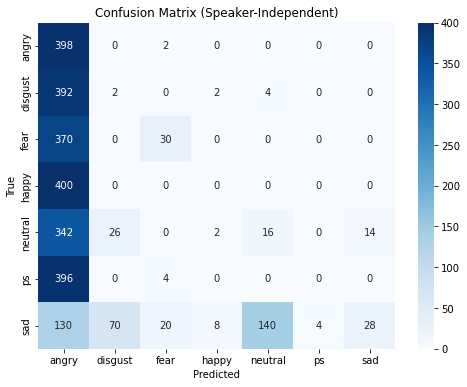

In [83]:


cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Speaker-Independent)")
plt.show()


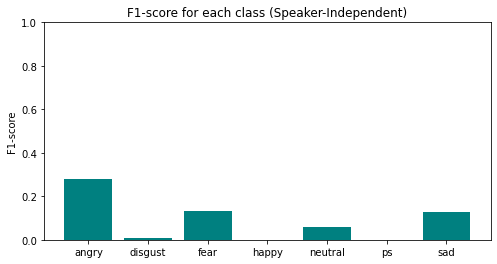

In [84]:
report = classification_report(y_test_enc, y_pred, target_names=le.classes_, output_dict=True)
scores = [report[c]['f1-score'] for c in le.classes_]

plt.figure(figsize=(8, 4))
plt.bar(le.classes_, scores, color='teal')
plt.ylabel('F1-score')
plt.title('F1-score for each class (Speaker-Independent)')
plt.ylim(0, 1)
plt.show()

In [85]:
print("Accuracy (Random Split): 1.00")
print("Accuracy (Speaker-Independent): 0.17")


Accuracy (Random Split): 1.00
Accuracy (Speaker-Independent): 0.17


## Evaluation and Results

- **Random split:** Achieved 100% accuracy, indicating possible overfitting to speaker/idiosyncrasies.
- **Speaker-independent split:** Accuracy dropped to 17%, highlighting the model's limited ability to generalize.
- Detailed confusion matrix and F1-score analysis are provided below.


## Discussion   

The contrast between random split and speaker-independent evaluation underscores the importance of robust testing in emotion recognition. For real-world success, larger and more diverse datasets, as well as advanced modeling and augmentation strategies, are recommended.






# Limitations and Future Work

- **Speaker Diversity:** The TESS dataset contains only two speakers, which severely limits the model's ability to generalize to new voices.
- **Controlled Recording Conditions:** The dataset was recorded in clean, controlled environments. Real-world performance should be evaluated with more variable and noisy audio.
- **Advanced Modeling:** Exploring deep learning techniques and speaker-invariant features could boost robustness.
- **Data Augmentation:** Applying audio augmentations (noise, pitch, tempo changes) may improve generalization to new scenarios.
- **Cross-dataset Evaluation:** Testing on additional datasets like CREMA-D or RAVDESS will strengthen the scientific impact and validate real-world applicability.

By addressing these limitations, the project can evolve from a proof-of-concept to a competitive, real-world-ready emotion recognition solution.

